In [1]:
import pkg_resources as pkg

path = pkg.resource_filename(__name__, "../")

import os

os.chdir(path)

/tmp/ipykernel_615530/3297475300.py:3: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  path = pkg.resource_filename(__name__, "../")


In [3]:
import mne
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
/home/guido/miniconda3/envs/physioex/lib/python3.10/site-packages/moabb/pipelines/__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(
/home/guido/miniconda3/envs/physioex/lib/python3.10/site-packages/braindecode/preprocessing/preprocess.py:55: UserW

In [10]:
# Carica i dati del dataset PhysioNet Sleep EDF
subjects = [0]  # Sostituisci con i numeri dei soggetti che vuoi caricare
records = [1]  # Sostituisci con i numeri dei record che vuoi caricare

file_paths = mne.datasets.sleep_physionet.age.fetch_data(
    subjects=subjects, recording=records
)

# Ogni elemento in file_paths è una tupla con il percorso al file EDF e il percorso al file di annotazione
edf_file_path, annot_file_path = file_paths[0]

# Carica i dati in un oggetto Raw
raw = mne.io.read_raw_edf(edf_file_path)

# Carica le annotazioni
annot = mne.read_annotations(annot_file_path)

# Aggiungi le annotazioni ai dati
raw.set_annotations(annot)

# Ora, 'raw' contiene i tuoi dati EEG
data = raw.get_data()

# E 'channel_names' contiene i nomi dei canali
channel_names = raw.info["ch_names"]

Using default location ~/mne_data for PHYSIONET_SLEEP...
Extracting EDF parameters from /home/guido/mne_data/physionet-sleep-data/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_615530/1541379829.py:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annot)


In [12]:
print(channel_names)

['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']


Creating RawArray with float64 data, n_channels=7, n_times=7950000
    Range : 0 ... 7949999 =      0.000 ...  7949.999 secs
Ready.
Using matplotlib as 2D backend.


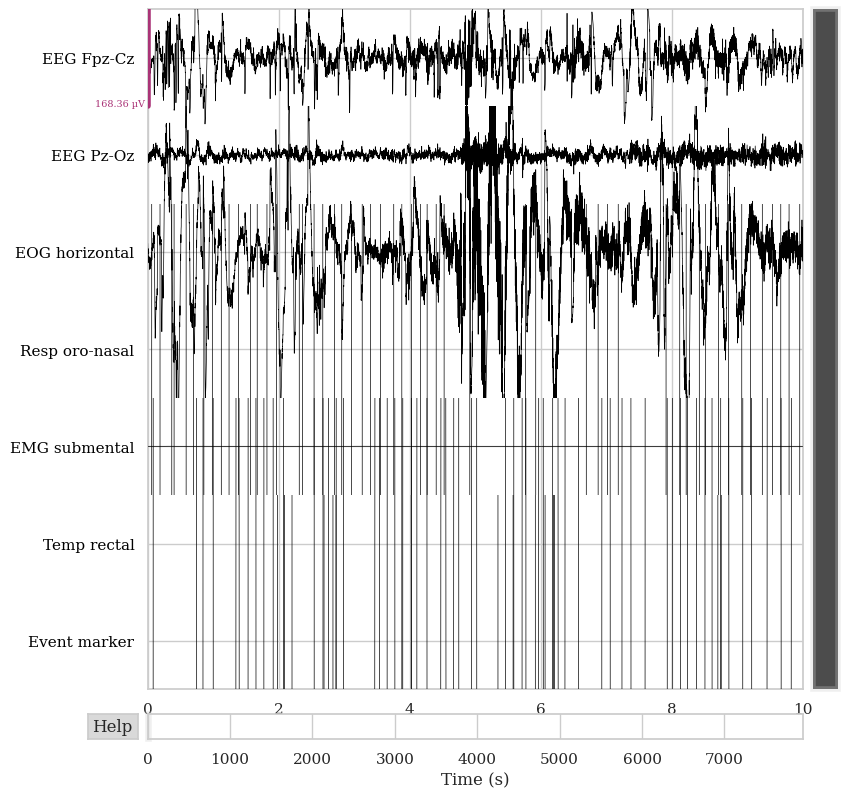

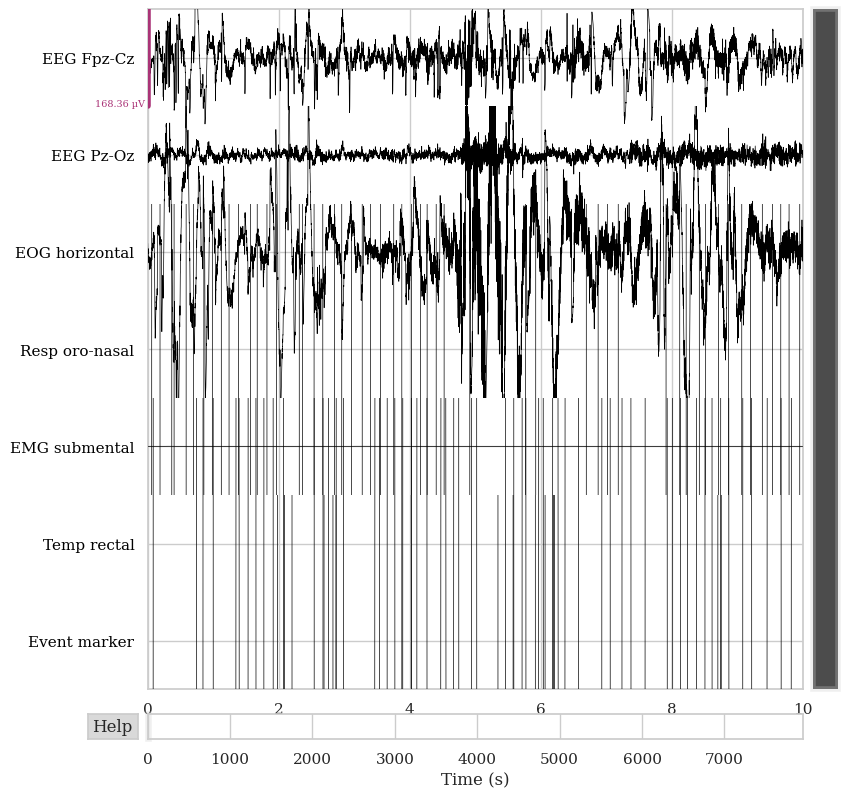

In [11]:
# Supponiamo che 'data' sia un array numpy 2D, dove ogni riga è un canale e ogni colonna è un punto dati
# E 'channel_names' è una lista di stringhe con i nomi dei canali

n_channels = data.shape[0]
sampling_rate = 1000  # Sostituisci con il tuo tasso di campionamento

channel_types = ["eeg"] * n_channels
info = mne.create_info(channel_names, sampling_rate, channel_types)

raw = mne.io.RawArray(data, info)

# Imposta un colore diverso per ogni canale
color_dict = dict(
    (ch_name, plt.cm.jet(i / n_channels)) for i, ch_name in enumerate(channel_names)
)

raw.plot(n_channels=n_channels, scalings="auto", color=color_dict, title="EEG Data")